In [1]:
!pip install kaggle


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "C:/Users/Alsae/.kaggle"

In [4]:
!kaggle competitions download -c titanic

In [5]:
import pandas as pd

df = pd.read_csv("C:/Users/Alsae/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape, df.dtypes


((891, 12),
 PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


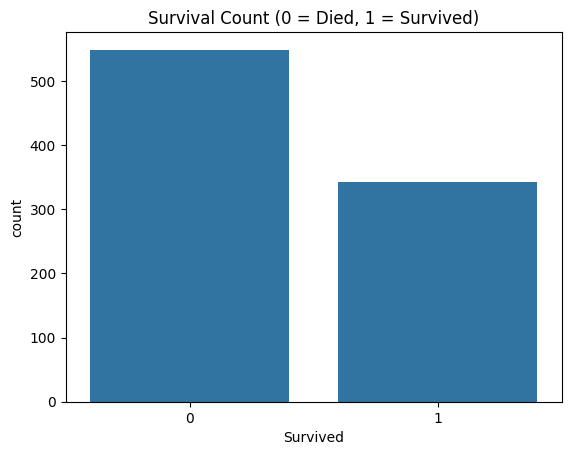

In [9]:
!pip install seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Survived", data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

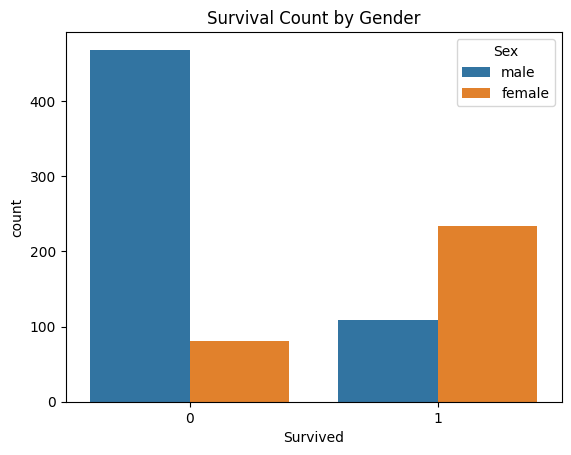

In [10]:
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Survival Count by Gender")
plt.show()


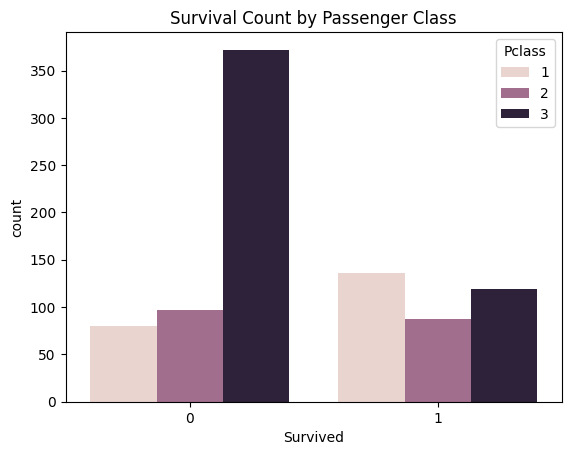

In [11]:
sns.countplot(x="Survived", hue="Pclass", data=df)
plt.title("Survival Count by Passenger Class")
plt.show()


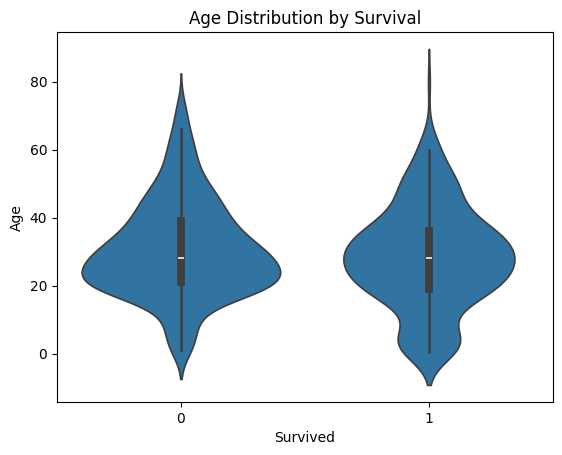

In [12]:
sns.violinplot(x="Survived", y="Age", data=df)
plt.title("Age Distribution by Survival")
plt.show()

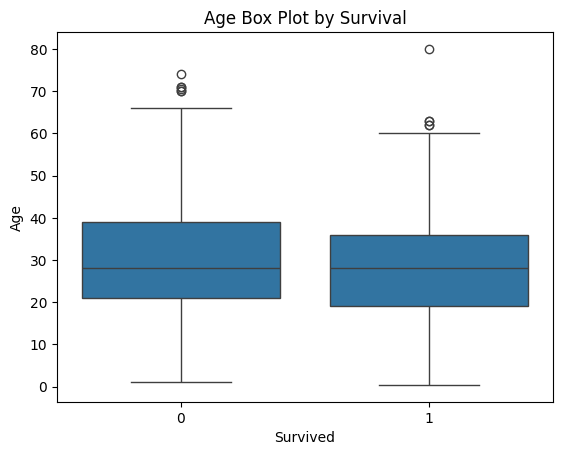

In [13]:
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age Box Plot by Survival")
plt.show()


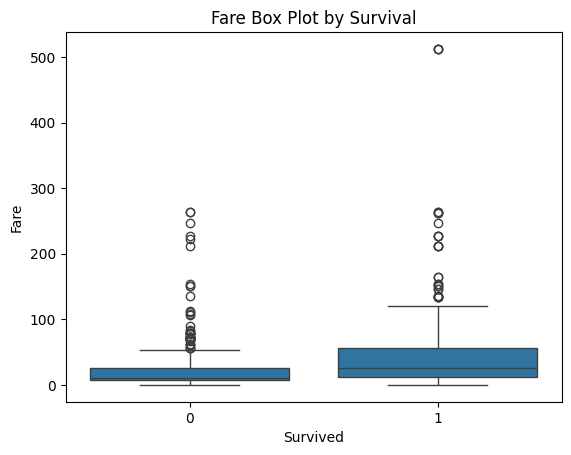

In [18]:
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare Box Plot by Survival")
plt.show()


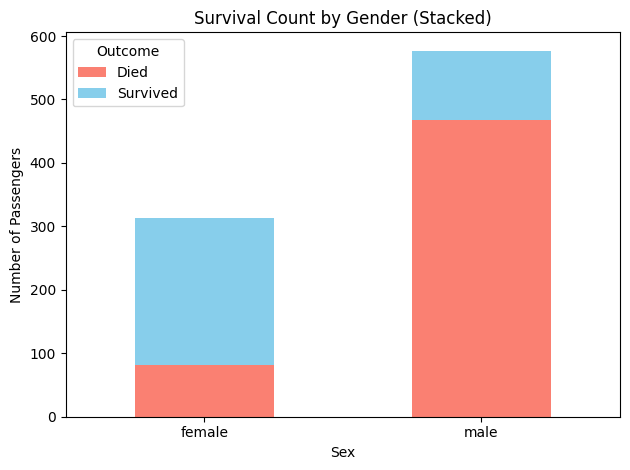

In [19]:
# Prepare the data
survived_by_sex = df.groupby(['Sex', 'Survived']).size().unstack()

# Plot it
survived_by_sex.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'])
plt.title("Survival Count by Gender (Stacked)")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.legend(["Died", "Survived"], title="Outcome")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


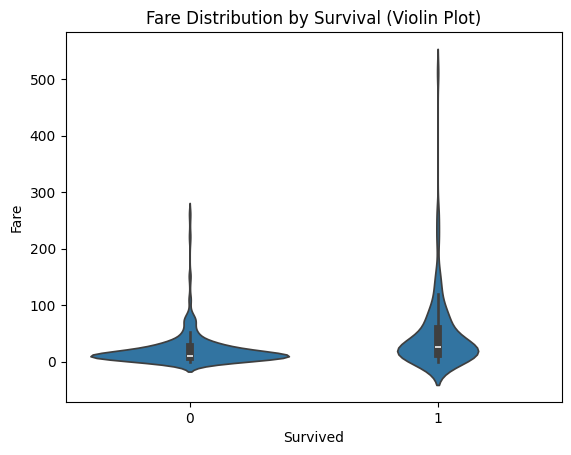

In [20]:
sns.violinplot(x="Survived", y="Fare", data=df)
plt.title("Fare Distribution by Survival (Violin Plot)")
plt.show()


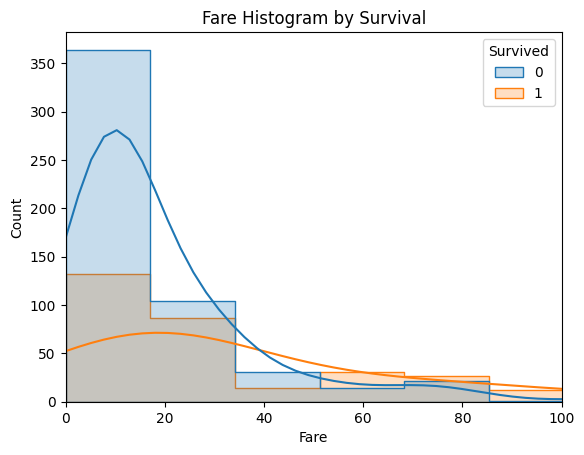

In [21]:
sns.histplot(data=df, x="Fare", hue="Survived", bins=30, kde=True, element="step")
plt.title("Fare Histogram by Survival")
plt.xlim(0, 100)  # Limit for better visibility
plt.show()


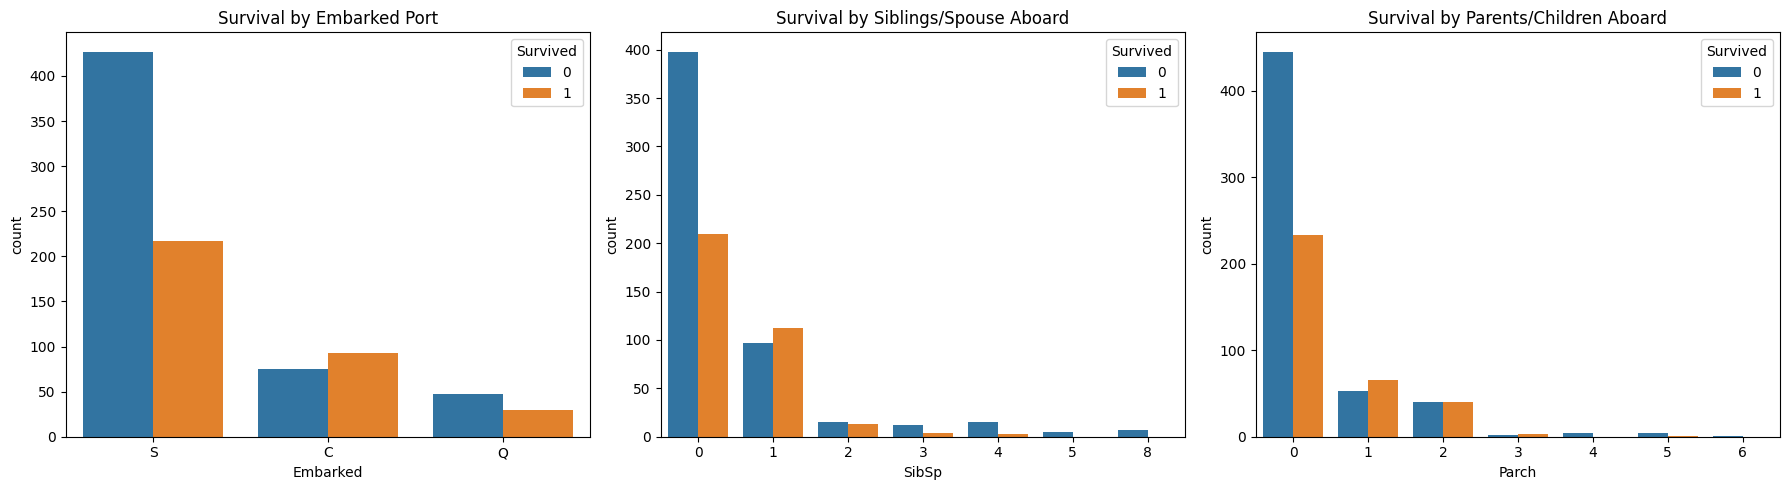

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Embarked vs Survived
sns.countplot(ax=axes[0], x="Embarked", hue="Survived", data=df)
axes[0].set_title("Survival by Embarked Port")

# 2. SibSp vs Survived
sns.countplot(ax=axes[1], x="SibSp", hue="Survived", data=df)
axes[1].set_title("Survival by Siblings/Spouse Aboard")

# 3. Parch vs Survived
sns.countplot(ax=axes[2], x="Parch", hue="Survived", data=df)
axes[2].set_title("Survival by Parents/Children Aboard")

plt.tight_layout()
plt.show()


In [23]:
# Fill Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop Cabin
df.drop("Cabin", axis=1, inplace=True)

# Confirm all handled
df.isnull().sum()


C:\Users\Alsae\AppData\Local\Temp\ipykernel_2212\1456998328.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\Alsae\AppData\Local\Temp\ipykernel_2212\1456998328.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
df.to_csv("C:/Users/Alsae/titanic/cleaned_titanic.csv", index=False)

In [3]:
import pandas as pd

df = pd.read_csv("C:/Users/Alsae/titanic/cleaned_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [4]:
# Extract Title using string operations
df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

# View counts of each title
df["Title"].value_counts()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Alsae\AppData\Local\Temp\ipykernel_2020\2783842967.py:2: SyntaxWarning: invalid escape sequence '\.'
  df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [6]:
# Replace rare titles
df["Title"] = df["Title"].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# Normalize similar titles
df["Title"] = df["Title"].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Show updated title counts
df["Title"].value_counts()


Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [7]:
# Create FamilySize
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Preview result
df[["SibSp", "Parch", "FamilySize"]].head()


,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [8]:
# Bin Age into categories
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 19, 59, 100], labels=["Child", "Teen", "Adult", "Senior"])

# Preview result
df[["Age", "AgeGroup"]].head(10)


,Age,AgeGroup
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,28.0,Adult
6,54.0,Adult
7,2.0,Child
8,27.0,Adult
9,14.0,Teen


In [9]:
# Bin Fare into categories using quartiles
df["FareBand"] = pd.qcut(df["Fare"], 4, labels=["Low", "Mid", "High", "Very High"])

# Preview result
df[["Fare", "FareBand"]].head(10)

,Fare,FareBand
0,7.2500,Low
1,71.2833,Very High
2,7.9250,Mid
3,53.1000,Very High
4,8.0500,Mid
5,8.4583,Mid
6,51.8625,Very High
7,21.0750,High
8,11.1333,Mid
9,30.0708,High


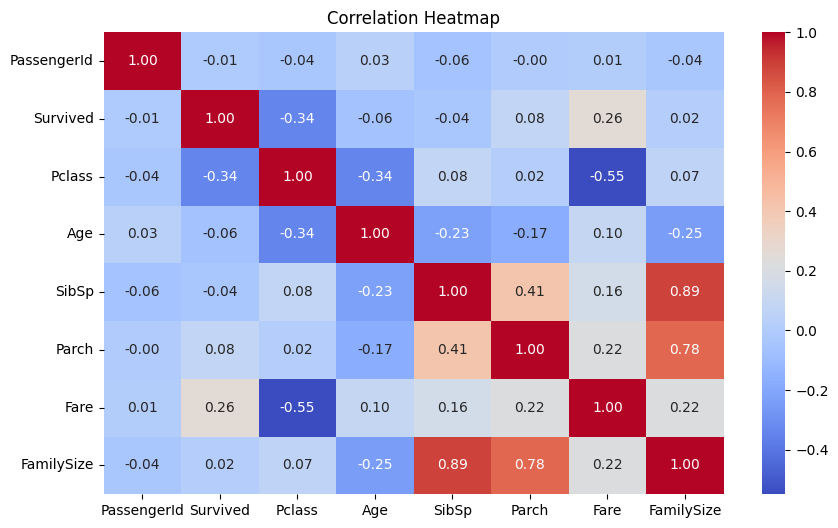

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only select numeric columns for correlation
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Encode 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked'
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Preview result
df[['Sex', 'Embarked']].head()

,Sex,Embarked
0,0,0
1,1,1
2,1,0
3,1,0
4,0,0


In [13]:
# Encode Title
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}
df['Title'] = df['Title'].map(title_mapping)

# Encode AgeGroup
age_mapping = {'Child': 0, 'Teen': 1, 'Adult': 2, 'Senior': 3}
df['AgeGroup'] = df['AgeGroup'].map(age_mapping)

# Encode FareBand
fare_mapping = {'Low': 0, 'Mid': 1, 'High': 2, 'Very High': 3}
df['FareBand'] = df['FareBand'].map(fare_mapping)

# Preview
df[['Title', 'AgeGroup', 'FareBand']].head()


,Title,AgeGroup,FareBand
0,0,2,0
1,2,2,3
2,1,2,1
3,2,2,3
4,0,2,1


In [14]:
df.to_csv("titanic_feature_engineered.csv", index=False)

In [15]:
# Drop unused/raw columns
df_model = df.drop(columns=["PassengerId", "Name", "Ticket", "SibSp", "Parch", "Age", "Fare"])

# Preview result to confirm
df_model.head()

,Survived,Pclass,Sex,Embarked,Title,FamilySize,AgeGroup,FareBand
0,0,3,0,0,0,2,2,0
1,1,1,1,1,2,2,2,3
2,1,3,1,0,1,1,2,1
3,1,1,1,0,2,2,2,3
4,0,3,0,0,0,1,2,1


In [16]:
# Save the final model-ready dataset
df_model.to_csv("titanic_model_ready.csv", index=False)


In [2]:
# Import pandas
import pandas as pd

# Load the final model-ready dataset
df_model = pd.read_csv("titanic_model_ready.csv")

# Check the first few rows to confirm
df_model.head()


,Survived,Pclass,Sex,Embarked,Title,FamilySize,AgeGroup,FareBand
0,0,3,0,0,0,2,2,0
1,1,1,1,1,2,2,2,3
2,1,3,1,0,1,1,2,1
3,1,1,1,0,2,2,2,3
4,0,3,0,0,0,1,2,1


In [3]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Define X and y
X = df_model.drop("Survived", axis=1)  # Features
y = df_model["Survived"]               # Target

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (712, 7) (712,)
Testing set shape: (179, 7) (179,)


In [4]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.7933

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [5]:
# Import the necessary library
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7933

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [6]:
# Import the necessary library
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8212

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       105
           1       0.78      0.80      0.79        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [7]:
# Import the necessary library
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7654

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       105
           1       0.72      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [8]:
# Import the necessary library
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8212

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [11]:
!pip install xgboost

# Import the necessary library
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 5.8/150.0 MB 32.5 MB/s eta 0:00:05
   --- ------------------------------------ 13.4/150.0 MB 34.3 MB/s eta 0:00:04
   ---- ----------------------------------- 16.3/150.0 MB 26.8 MB/s eta 0:00:05
   ----- ---------------------------------- 21.2/150.0 MB 27.0 MB/s eta 0:00:05
   ------ --------------------------------- 26.2/150.0 MB 26.3 MB/s eta 0:00:05
   ------- -------------------------------- 27.8/150.0 MB 22.8 MB/s eta 0:00:06
   -------- ------------------------------- 30.9/150.0 MB 21.8 MB/s eta 0:00:06
   --------- ------------------------------ 34.6/150.0 MB 21.1 MB/s eta 0:00:06
   --------- ------------------------------ 37.5/150.0 MB 20.7 MB/s eta 0:00:06
   ---------- ----------------------------- 40.4/150.0 MB 19.5 MB/s eta 0:00:06
   ----------- ---------------------------- 44.3/150.0 MB 19.5 MB/s eta 0:00:06
   ------------- -------------------------- 49.0/1


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


XGBoost Accuracy: 0.8380

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       105
           1       0.80      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



C:\Users\Alsae\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:58:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy: 0.8342


In [14]:
# Train the optimized XGBoost model
xgb_optimized = XGBClassifier(
    colsample_bytree=0.8, 
    learning_rate=0.01, 
    max_depth=3, 
    n_estimators=200, 
    subsample=0.8, 
    random_state=42, 
    eval_metric='logloss'
)

xgb_optimized.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb_optimized = xgb_optimized.predict(X_test)

# Evaluate the optimized model
accuracy_xgb_optimized = accuracy_score(y_test, y_pred_xgb_optimized)
print(f"Optimized XGBoost Accuracy: {accuracy_xgb_optimized:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_optimized))


Optimized XGBoost Accuracy: 0.8156

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



<Figure size 1000x800 with 0 Axes>

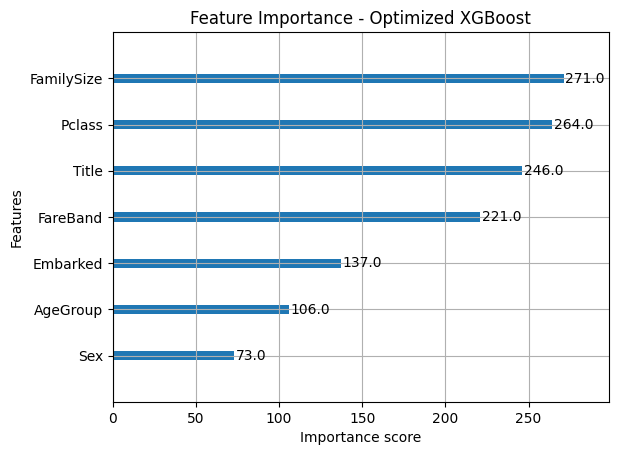

In [16]:
# Plot feature importance using the non-optimized XGBoost model
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_optimized, importance_type="weight", max_num_features=10)
plt.title("Feature Importance - Optimized XGBoost")
plt.show()


In [17]:
# Import joblib to save the model
import joblib

# Save the best non-optimized XGBoost model
joblib.dump(xgb_model, "best_xgboost_model.pkl")

print("Model saved as best_xgboost_model.pkl")


Model saved as best_xgboost_model.pkl


In [19]:
# Load the test dataset
test_df = pd.read_csv("test.csv")

# Handle missing values (corrected)
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].median())
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())

# Extract Title from Name (corrected)
test_df["Title"] = test_df["Name"].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_df["Title"] = test_df["Title"].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                             'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df["Title"] = test_df["Title"].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Create FamilySize
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

# Bin Age into categories
test_df["AgeGroup"] = pd.cut(test_df["Age"], bins=[0, 12, 19, 59, 100], labels=["Child", "Teen", "Adult", "Senior"])

# Bin Fare into categories
test_df["FareBand"] = pd.qcut(test_df["Fare"], 4, labels=["Low", "Mid", "High", "Very High"])

# Encode categorical features
test_df["Sex"] = test_df["Sex"].map({'male': 0, 'female': 1})
test_df["Embarked"] = test_df["Embarked"].map({'S': 0, 'C': 1, 'Q': 2})

# Encode Title, AgeGroup, FareBand
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}
test_df["Title"] = test_df["Title"].map(title_mapping)
age_mapping = {'Child': 0, 'Teen': 1, 'Adult': 2, 'Senior': 3}
test_df["AgeGroup"] = test_df["AgeGroup"].map(age_mapping)
fare_mapping = {'Low': 0, 'Mid': 1, 'High': 2, 'Very High': 3}
test_df["FareBand"] = test_df["FareBand"].map(fare_mapping)

# Drop unnecessary columns
test_df_model = test_df.drop(columns=["PassengerId", "Name", "Ticket", "SibSp", "Parch", "Age", "Fare", "Cabin"])

# Preview processed test data
print(test_df_model.head())


   Pclass  Sex  Embarked  Title  FamilySize AgeGroup FareBand
0       3    0         2      0           1        2        0
1       3    1         0      2           2        2        0
2       2    0         2      0           1        3        1
3       3    0         0      0           1        2        1
4       3    1         0      2           3        2        1


In [20]:
# Save the preprocessed test dataset
test_df_model.to_csv("titanic_test_ready.csv", index=False)

print("Test dataset saved as titanic_test_ready.csv")

Test dataset saved as titanic_test_ready.csv


In [22]:
# Import joblib to load the model
import joblib

# Load the saved best model
best_model = joblib.load("best_xgboost_model.pkl")

# Check if the model is loaded correctly
print("Model loaded successfully:", best_model)


Model loaded successfully: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)


In [23]:
# Check the shape of the test data
print("Test Data Shape:", test_df_model.shape)


Test Data Shape: (418, 7)


In [25]:
# Import joblib to save the model
import joblib
from xgboost import XGBClassifier

# Initialize and train the model
best_model = XGBClassifier(random_state=42, eval_metric='logloss')
best_model.fit(X_train, y_train)

# Save the trained model correctly
joblib.dump(best_model, "best_xgboost_model.pkl")

print("Model retrained and saved correctly.")


Model retrained and saved correctly.


In [26]:
# Load the correctly saved model
best_model = joblib.load("best_xgboost_model.pkl")
print("Model loaded successfully after retraining.")


Model loaded successfully after retraining.


In [27]:
# Make predictions on the test set
predictions = best_model.predict(test_df_model)

# Add predictions to the original test DataFrame (for submission)
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": predictions})

# Save the submission file for Kaggle
submission.to_csv("titanic_predictions.csv", index=False)

print("Predictions saved as titanic_predictions.csv")


Predictions saved as titanic_predictions.csv


In [28]:
# Preview the prediction file
import pandas as pd
submission = pd.read_csv("titanic_predictions.csv")
print(submission.head())


   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         0
